In [18]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#상수 정의하기
a=tf.constant(2)
b=tf.constant(3)
c=tf.constant(4)

# 연산 정의하기
calc1_op=a+b*c
calc2_op=(a+b)*c

# 세션 시작
sess=tf.Session()
res1=sess.run(calc1_op)
print(res1)
res2=sess.run(calc2_op)
print(res2)

14
20


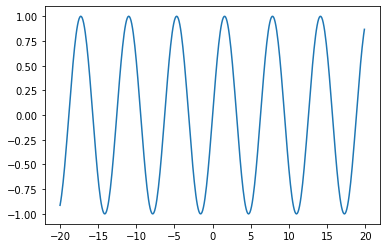

In [19]:
###
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(-20,20,0.1)
y=np.sin(x)
plt.plot(x,y)

In [20]:
# a+b 연산
a=tf.constant(100)
b=tf.constant(50)
add_op=a+b
# 변수v 선언하기
v=tf.Variable(0)
# 변수 v에 add_op의 결과 대입하기
let_op=tf.assign(v,add_op)

# 세션 시작하기
sess=tf.Session()
# 변수 초기화
sess.run(tf.global_variables_initializer())
# let_op 실행하기
sess.run(let_op)
# 출력하기
print(sess.run(v))

150


In [21]:
# 상수 정의
a=tf.constant(120,name='a')
b=tf.constant(130,name='b')
c=tf.constant(140,name='c')
# 변수 정의
v=tf.Variable(0,name='v')
# 데이터 플로우 그래프 정의
calc_op=a+b+c
assign_op=tf.assign(v,calc_op)
# 세션 실행
sess=tf.Session()
sess.run(assign_op)
# v의 내용 출력
print(sess.run(v))

390


In [22]:
## tensorflow 플레이스 홀더
## 탬플릿처럼 값을 넣을 공간을 만들어두는 기능
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#플레이스 홀더 정의
a=tf.placeholder(tf.int32,[3])  # 정수 자료형 3개 가진 배열
#[x,y,z]

# 배열 모든 값을 2배 하는 연산 정의
b=tf.constant(2)
x2_op=a*b

# 세션 시작
sess=tf.Session()

# 플레이스 홀더에 값을 넣고 실행하기
r1=sess.run(x2_op,feed_dict={a:[1,2,3]})
print(r1)
r2=sess.run(x2_op,feed_dict={a:[10,20,10]})
print(r2)


[2 4 6]
[20 40 20]


In [23]:
# 플레이스 홀더 정의
a=tf.placeholder(tf.int32,[None])

#10배 연산 정의
b=tf.constant(10)
x10_op=a*b

sess=tf.Session()

r1=sess.run(x10_op,feed_dict={a:[1,2,3,4,5]})
print(r1)
r2=sess.run(x10_op,feed_dict={a:[10,20]})
print(r2)

[10 20 30 40 50]
[100 200]


In [32]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 키, 몸무게 레이블이 적힌 csv파일 읽어 들이기
csv=pd.read_csv('data/bmi.csv')
# 데이터 정규화
csv['height']=csv['height']/200
csv['weight']=csv['weight']/100

# 레이블을 배열로 변환하기
# thin-(1,0,0) / normal=(0,1,0) / fat=(0,0,1)
bclass={'thin':[1,0,0],'normal':[0,1,0],'fat':[0,0,1]}
csv['label_pat']=csv['label'].apply(lambda x: np.array(bclass[x]))

# 테스트를 위한 데이터 분류
test_csv=csv[15000:20000]
test_pat=test_csv[['weight','height']]
test_ans=list(test_csv['label_pat'])
# 데이터 플로우 그래프 구축
# 플레이스 홀더 선언
x=tf.placeholder(tf.float32,[None,2])   #키와 몸무게 데이터 넣기
y_=tf.placeholder(tf.float32,[None,3])   # 정답 레이블

# 변수 선언
w=tf.Variable(tf.zeros([2,3]))  #가중치
b=tf.Variable(tf.zeros([3]))    #바이어스

# 소프트맥스 회귀 정의하기
y=tf.nn.softmax(tf.matmul(x,w)+b)

# 모델 훈련
cross_entropy=-tf.reduce_sum(y_* tf.log(y))
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(cross_entropy)

# 정답률 구하기
predict=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(predict,tf.float32))

# 세션 시작
sess=tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화

# 학습 시키기
for step in range(3500):
    i=(step*100)%14000
    rows=csv[1+i:1+i+100]
    x_pat=rows[['weight','height']]
    y_ans=list(rows['label_pat'])
    fd={x:x_pat,y_:y_ans}
    sess.run(train,feed_dict=fd)
    if step%500==0:
        cre=sess.run(cross_entropy,feed_dict=fd)
        acc=sess.run(accuracy, feed_dict={x:test_pat,y_:test_ans})
        print('step=',step,'cre=',cre,'acc=',acc)
# 최종 정답률
acc=sess.run(accuracy,feed_dict={x:test_pat,y_:test_ans})
print('정답률=',acc)


step= 0 cre= 109.09518 acc= 0.376
step= 500 cre= 56.316204 acc= 0.8676
step= 1000 cre= 44.195297 acc= 0.9256
step= 1500 cre= 37.261543 acc= 0.9224
step= 2000 cre= 38.844414 acc= 0.953
step= 2500 cre= 27.800255 acc= 0.9452
step= 3000 cre= 31.556978 acc= 0.963
정답률= 0.9678


In [5]:
## TenserBoard로 시각화
# 곱하기
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# 데이터 플로우 그래프 구축하기
a=tf.constant(20,name='a')
b=tf.constant(30,name='b')
mul_op=a*b
#세션 생성
sess=tf.Session()
# TensorBoard 사용하기
tw=tf.summary.FileWriter('log_dir',graph=sess.graph)

# 세션 실행
print(sess.run(mul_op))



Instructions for updating:
non-resource variables are not supported in the long term
600


In [3]:
!tensorboard --logdir=log_dir

^C


In [6]:
%load_ext tensorboard
%tensorboard --logdir ./log_dir/zy

In [7]:
# 변수 사용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
a=tf.constant(100,name='a')
b=tf.constant(200,name='b')
c=tf.constant(300,name='c')
v=tf.Variable(0,name='v')

# 곱셈 수행하는 그래프 정의
calc_op=a+b*c
assign_op=tf.assign(v,calc_op)
# 세션 생성
sess=tf.Session()
# TensorBoard 사용
tw=tf.train.sumary('log_dir',graph=sess.graph)

#세션 실행
sess.run(assign_op)
print(sess.run(v))

AttributeError: module 'tensorflow.compat.v1.train' has no attribute 'SummaryWriter'